In [150]:
import requests
import secrets
import time
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

In [11]:
# Bringing in API-KEY
load_dotenv('./.env')      
key = os.getenv("API_KEY")


In [117]:
list_of_files = ['arkham_txns.csv','arkham_txns (10).csv','arkham_txns (9).csv']#,'arkham_txns (1).csv','arkham_txns (2).csv','arkham_txns (3).csv','arkham_txns (4).csv','arkham_txns (5).csv','arkham_txns (6).csv','arkham_txns (7).csv','arkham_txns (8).csv']

current_transacts = pd.DataFrame()
for i in list_of_files:
    df = pd.read_csv(f"../data/{i}")
    current_transacts = pd.concat([current_transacts, df], ignore_index=True)
list_of_addresses = list(current_transacts['fromAddress'])+list(current_transacts['toAddress'])


In [118]:
list_of_addresses = list(set(list_of_addresses))
len(list_of_addresses)

20

In [119]:
url = 'https://api.etherscan.io/api'
all_transactions =[]


for address in list_of_addresses:


    page = 0
    while True:
        
        params = {
            'module': 'account',
            'action': 'txlist',
            'address': address,
            'startblock': 0,
            'endblock': 99999999,
            'page': page,
            'offset': 10,
            'sort': 'asc',
            'apikey': key
        }
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            
            if data['result']:
                all_transactions.extend(data['result'])
                page+=1
            else:
                break
        else:
            break
    print(f"still going {address}")

            

still going 0x5f4C28B8bAe491157b90a90c7AA57DF7f823343a
still going 0xe35e9842fceaCA96570B734083f4a58e8F7C5f2A
still going 0x31eF83a530Fde1B38EE9A18093A333D8Bbbc40D5
still going 0x7444d1DCde03d554205D8655721C969A89De113F
still going 0x0938C63109801Ee4243a487aB84DFfA2Bba4589e
still going 0xeCc90d54B10ADd1ab746ABE7E83abe178B72aa9E
still going 0xC5C3E9f4eF6Ee08906779DbC3B54896Ed4886a60
still going 0xB5Ee21786D28c5Ba61661550879475976B707099
still going 0xEB8350EA82b3852e63EFd1c55B2EF3f3BBabB938
still going 0x8704EE9AB8622BbC25410C7D4717ED51f776c7f6
still going 0xD6cCEDF2aF0e2885673F3e60CC43524333069C42
still going 0x7EcAe810B6773b6B416e860acc945b1fAF11943f
still going 0xf599C6d0dB97fed9180A163c73E9970c1e981F01
still going 0xC25cEf6061Cf5dE5eb761b50E4743c1F5D7E5407
still going 0xC4ABADE3a15064F9E3596943c699032748b13352
still going 0x5Eb4ED9F745531221FAE41906e11d37642B15da6
still going 0x23f53E7dF6fa555340b400dD6A2bd3D594B10BF3
still going 0x0000000000000000000000000000000000000000
still goin

In [120]:
len(all_transactions)

16024

In [148]:
eth_df = pd.DataFrame(all_transactions)

In [149]:
eth_df.to_csv('../data/eth_trans_data.csv')

In [136]:
'' in eth_df['txreceipt_status'].unique()

True

In [137]:
int_list = ['blockNumber', 'timeStamp', 'nonce', 'transactionIndex', 'gas', 'gasPrice', 'isError', 'cumulativeGasUsed', 'gasUsed', 'confirmations']
eth_df[int_list] = eth_df[int_list].astype(float)
eth_df.head()


,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,methodId,functionName
0,17136393.0,1.682585e+09,0x8366585ce739c108d93741d776596f93c16983d560b0...,36.0,0x7bcdb8aec9a817b3cde1cd7892608a7cb089e682a82a...,33.0,0x1833f626c2fbb5c51b7feeca189eb2ca95fb5aa6,0xe35e9842fceaca96570b734083f4a58e8f7c5f2a,788176968828575100,23332.0,3.529341e+10,0.0,1,0x1186ec330000000000000000000000001833f626c2fb...,,2949253.0,23332.0,2044002.0,0x1186ec33,"deposit(address recipient,address originToken,..."
1,17149378.0,1.682743e+09,0xfa448c24afe28231f1e9d7ffa02197212e3eaaa7e7a3...,386.0,0xd81a9c262b025c1d9a55a4508a396094bc52ea973581...,44.0,0x980a9864331af230d08287a0e5f67fdb9bde4ce7,0xe35e9842fceaca96570b734083f4a58e8f7c5f2a,118320023500000000,23320.0,3.443975e+10,0.0,1,0x1186ec33000000000000000000000000980a9864331a...,,3929836.0,23320.0,2031017.0,0x1186ec33,"deposit(address recipient,address originToken,..."
2,17932219.0,1.692247e+09,0x917b569c0740d61555781173c18b1dabd9370566b996...,157.0,0x6669a0555cec9767cda3e61651880e076d7dd824d62e...,53.0,0x964edb5c66f6f974684cfcd22738c49664f1bf16,0xe35e9842fceaca96570b734083f4a58e8f7c5f2a,48492223253902017,23320.0,1.751511e+10,0.0,1,0x1186ec33000000000000000000000000964edb5c66f6...,,5929118.0,23320.0,1248176.0,0x1186ec33,"deposit(address recipient,address originToken,..."
3,18206076.0,1.695564e+09,0x172f6254a710be70e605d6154c67c33c0d1d9ff422aa...,2108.0,0xca7e163f2c2f57770a6fb204acbc1e5abcefad275e08...,30.0,0x9f9ebce72c0715cdbad4d589986eb22f6782a1ce,0xe35e9842fceaca96570b734083f4a58e8f7c5f2a,1000000000000000,34980.0,9.000000e+09,0.0,1,0x1186ec330000000000000000000000009f9ebce72c07...,,2489623.0,23320.0,974319.0,0x1186ec33,"deposit(address recipient,address originToken,..."
4,18873557.0,1.703638e+09,0xfb1704cbfa2b8b8c97ecfaee4849c0bdc60f6901aa84...,34.0,0x15ffd876b18b93d921be759f929d528c0e1656717ac8...,58.0,0x2dacd3c3ffe8bf9bfca57de0785e934bc689445d,0xe35e9842fceaca96570b734083f4a58e8f7c5f2a,0,701084.0,1.434217e+10,0.0,1,0x1186ec330000000000000000000000002dacd3c3ffe8...,,6295955.0,23332.0,306838.0,0x1186ec33,"deposit(address recipient,address originToken,..."


In [138]:
eth_df['functionName'].value_counts()

functionName
                                                                                                                                                                                             10643
transfer(address _to, uint256 _value)                                                                                                                                                         3171
approve(address _spender, uint256 _value)                                                                                                                                                      563
execTransaction(address to, uint256 value, bytes data, uint8 operation, uint256 safeTxGas, uint256 baseGas, uint256 gasPrice, address gasToken, address refundReceiver, bytes signatures)      498
buyAndFree22457070633(uint256 amount)                                                                                                                                                          303
            

1707200003.0 1438922865.0


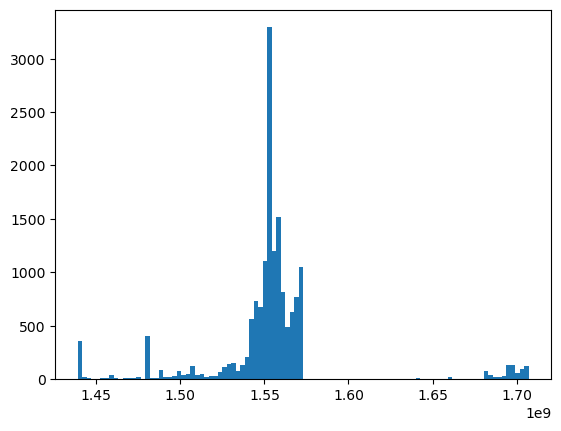

In [139]:
plt.hist(eth_df['timeStamp'], bins=100);
print(max(eth_df['timeStamp']), min(eth_df['timeStamp']))

In [140]:
eth_df.shape

(16024, 20)

In [141]:
eth_df['dateTime'] = pd.to_datetime(eth_df['timeStamp'], unit='s')
eth_df.head()

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,...,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,methodId,functionName,dateTime
0,17136393.0,1.682585e+09,0x8366585ce739c108d93741d776596f93c16983d560b0...,36.0,0x7bcdb8aec9a817b3cde1cd7892608a7cb089e682a82a...,33.0,0x1833f626c2fbb5c51b7feeca189eb2ca95fb5aa6,0xe35e9842fceaca96570b734083f4a58e8f7c5f2a,788176968828575100,23332.0,...,0.0,1,0x1186ec330000000000000000000000001833f626c2fb...,,2949253.0,23332.0,2044002.0,0x1186ec33,"deposit(address recipient,address originToken,...",2023-04-27 08:40:23
1,17149378.0,1.682743e+09,0xfa448c24afe28231f1e9d7ffa02197212e3eaaa7e7a3...,386.0,0xd81a9c262b025c1d9a55a4508a396094bc52ea973581...,44.0,0x980a9864331af230d08287a0e5f67fdb9bde4ce7,0xe35e9842fceaca96570b734083f4a58e8f7c5f2a,118320023500000000,23320.0,...,0.0,1,0x1186ec33000000000000000000000000980a9864331a...,,3929836.0,23320.0,2031017.0,0x1186ec33,"deposit(address recipient,address originToken,...",2023-04-29 04:28:23
2,17932219.0,1.692247e+09,0x917b569c0740d61555781173c18b1dabd9370566b996...,157.0,0x6669a0555cec9767cda3e61651880e076d7dd824d62e...,53.0,0x964edb5c66f6f974684cfcd22738c49664f1bf16,0xe35e9842fceaca96570b734083f4a58e8f7c5f2a,48492223253902017,23320.0,...,0.0,1,0x1186ec33000000000000000000000000964edb5c66f6...,,5929118.0,23320.0,1248176.0,0x1186ec33,"deposit(address recipient,address originToken,...",2023-08-17 04:41:23
3,18206076.0,1.695564e+09,0x172f6254a710be70e605d6154c67c33c0d1d9ff422aa...,2108.0,0xca7e163f2c2f57770a6fb204acbc1e5abcefad275e08...,30.0,0x9f9ebce72c0715cdbad4d589986eb22f6782a1ce,0xe35e9842fceaca96570b734083f4a58e8f7c5f2a,1000000000000000,34980.0,...,0.0,1,0x1186ec330000000000000000000000009f9ebce72c07...,,2489623.0,23320.0,974319.0,0x1186ec33,"deposit(address recipient,address originToken,...",2023-09-24 13:52:59
4,18873557.0,1.703638e+09,0xfb1704cbfa2b8b8c97ecfaee4849c0bdc60f6901aa84...,34.0,0x15ffd876b18b93d921be759f929d528c0e1656717ac8...,58.0,0x2dacd3c3ffe8bf9bfca57de0785e934bc689445d,0xe35e9842fceaca96570b734083f4a58e8f7c5f2a,0,701084.0,...,0.0,1,0x1186ec330000000000000000000000002dacd3c3ffe8...,,6295955.0,23332.0,306838.0,0x1186ec33,"deposit(address recipient,address originToken,...",2023-12-27 00:52:47


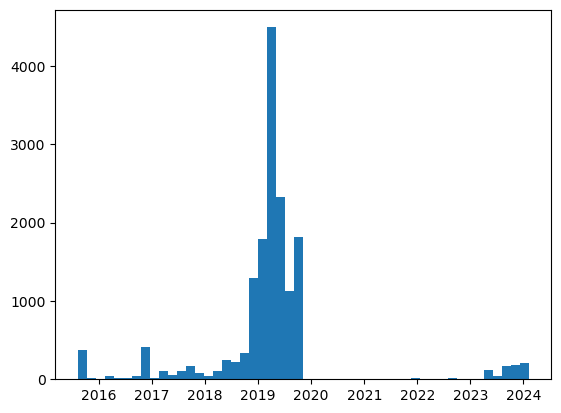

In [142]:
plt.hist(eth_df['dateTime'], bins=50);

In [143]:
eth_df['from'].value_counts()

from
0xc8a5ba5868a5e9849962167b2f99b2040cee2031    3480
0xbc28029d248fc60bce0bac01cf41a53aeeae06f9    2231
0x4d4ffb448194504242267585f0ea6f9de6a96de3     635
0xb5d441eb94950ee0efbb825c45d6358c53e06f0b     416
0xd8c96ee029945fe1b4272035b704dc52ebcdf051     396
                                              ... 
0xd3924f3d53064e1840bcf09c71e0857a48177a32       1
0x5d907bf773a9b58fe082ee542ee8cbb8649615a6       1
0x1118e5a3bdccee57085f19e662fde7c5c19cf9b6       1
0x811814d26abe1699b2757e1bf80f5d006339895f       1
0xbd271b69d346bbab04172bc91a44a008fbe6705b       1
Name: count, Length: 1124, dtype: int64

In [145]:
eth_df['timeOnly'] = eth_df['dateTime'].dt.time
eth_df['hours'] = eth_df['timeOnly'].apply(lambda x: x.hour)

(array([407., 484., 460., 519., 334., 391., 444., 395., 344., 388., 383.,
        503., 426., 528., 904., 467., 460., 522., 390., 385., 386., 418.,
        323., 382.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

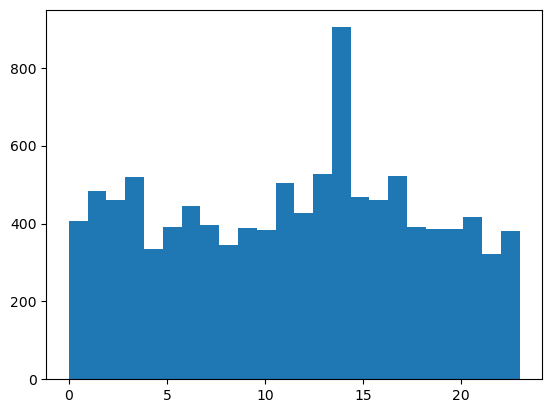

In [146]:


plt.hist(eth_df.groupby('functionName').get_group('')['hours'], bins=24)

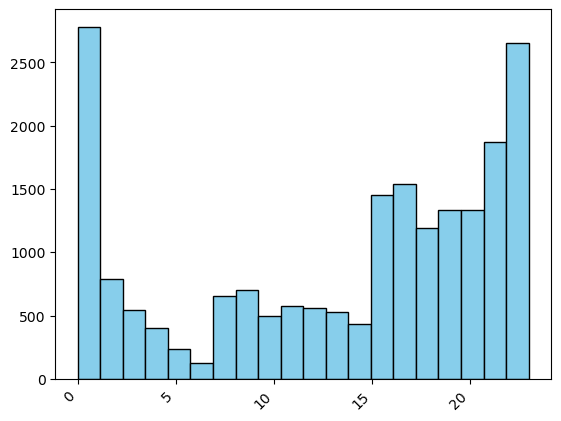

In [ ]:
eth_df['timeOnly'] = eth_df['dateTime'].dt.time
eth_df['hours'] = eth_df['timeOnly'].apply(lambda x: x.hour)
plt.hist(eth_df['hours'], bins=20, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right');


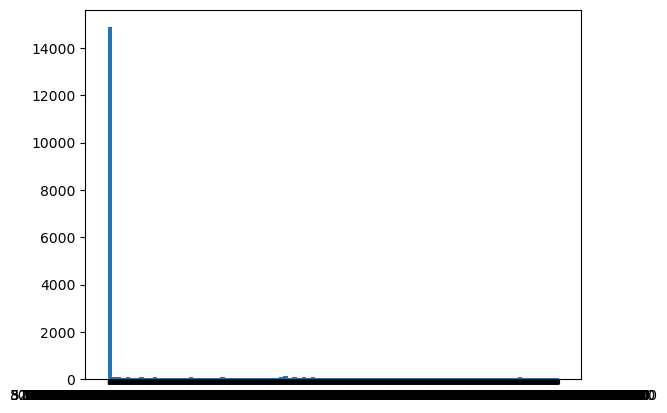

In [ ]:
plt.hist(eth_df['value'], bins = 100);



In [151]:
eth_ticker = "ETH-USD"

start_d = "2015-08-01"
end_d = "2024-02-01"

price_eth = yf.download(eth_ticker, start = start_d, end = end_d)



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992


In [155]:
price_eth = price_eth.sort_index()
price_eth_close = price_eth['Close']
price_eth_close.to_csv('../data/eth_price_per_day.csv')